In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the data in the dataframe
df=pd.read_csv('avocado.csv',index_col=0)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [4]:
df.shape

(1517, 13)

In [5]:
#checking for the null values
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
df['type'].value_counts()

conventional    1517
Name: type, dtype: int64

In [7]:
#found that there is only one type which is conventional 

In [8]:

df['year'].value_counts()

2015    1270
2016     247
Name: year, dtype: int64

In [9]:
df['region'].value_counts()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
GrandRapids            23
Chicago                23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
HarrisburgScranton     19
Syracuse               19
Midsouth               18
GreatLakes             18
Roanoke                17
MiamiFtLauderdale      17
DallasFtWort

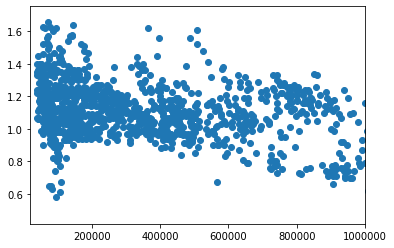

In [10]:
#plotting Average Price Vs Volume
plt.scatter(x='Total Volume',y='AveragePrice',data=df)
plt.xlim([20000,1000000])
plt.show()

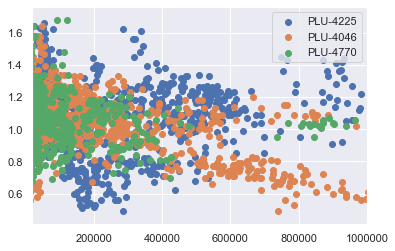

In [11]:
#Plotting Average price for each PLU(4046,4225,4770)
sns.set(font_scale=1.0)
plt.scatter(x='4225',y='AveragePrice',data=df,label='PLU-4225')
plt.scatter(x='4046',y='AveragePrice',data=df,label='PLU-4046')
plt.scatter(x='4770',y='AveragePrice',data=df,label='PLU-4770')
plt.legend(loc='upper right')
plt.xlim([20000,1000000])
plt.show()

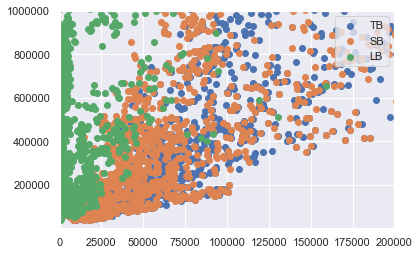

In [12]:
#Plotting Total bags vs Total Volume
sns.set(font_scale=1.0)
plt.scatter(x='Total Bags',y='Total Volume',data=df,label='TB')
plt.scatter(x='Small Bags',y='Total Volume',data=df,label='SB')
plt.scatter(x='Large Bags',y='Total Volume',data=df,label='LB')
plt.legend(loc='upper right')
plt.ylim([1000,1000000])
plt.xlim([0,200000])
plt.show()

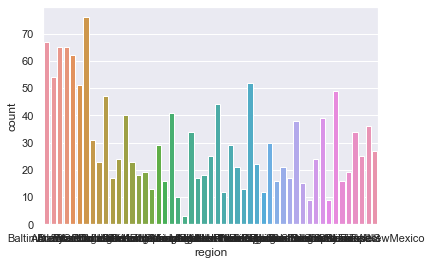

In [13]:
sns.countplot(x='region',data=df)


In [14]:
#grouping average price by region
df[['AveragePrice','region']].groupby('region',as_index=False).mean().sort_values(by='AveragePrice',ascending=True)

,region,AveragePrice
31,PhoenixTucson,0.659808
10,DallasFtWorth,0.755882
50,WestTexNewMexico,0.757407
17,Houston,0.780690
42,SouthCentral,0.818718
21,LosAngeles,0.863333
49,West,0.940833
3,Boise,0.974923
38,SanDiego,0.993421
36,RichmondNorfolk,1.004762


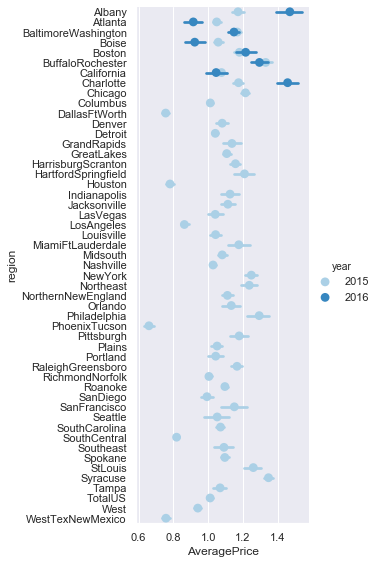

In [15]:
#Further checking the average price by the region
g = sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=8,
                   aspect=0.6,
                   palette='Blues',
                   join=False,
              )

In [16]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [17]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000


In [18]:
#all the attributes are highly correlated with each other

In [19]:
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df['year'] = pd.DatetimeIndex(df['Date']).year

In [20]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [21]:
df[['region','Small Bags','Large Bags','XLarge Bags']].groupby(['region'],as_index=False).mean()

,region,Small Bags,Large Bags,XLarge Bags
0,Albany,1.181550e+04,347.246866,3.547164
1,Atlanta,4.740999e+04,38747.062407,60.306481
2,BaltimoreWashington,1.801890e+05,4221.447231,272.483077
3,Boise,2.526996e+04,748.342154,36.056308
4,Boston,1.210160e+05,764.848710,575.326935
5,BuffaloRochester,6.554765e+04,384.352549,682.826667
6,California,1.286774e+06,109555.190526,18792.960132
7,Charlotte,5.270983e+04,5230.527742,47.535806
8,Chicago,9.470367e+04,3061.164348,533.601304
9,Columbus,1.866047e+04,4032.940000,1938.165745


In [22]:
#dropping teh attributes type and date
df1=df.drop(['type','Date'],axis=1)


In [23]:
df1.head()


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,11,29


In [24]:
df1.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,0.060642,0.092589
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,-0.055212,-0.034857
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,-0.053007,-0.031806
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,-0.058429,-0.044008
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,-0.055079,-0.021318
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,-0.047747,-0.021137
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,-0.048978,-0.016462
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,-0.039242,-0.046578
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,0.021452,0.019315
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000,-0.013144,0.029744


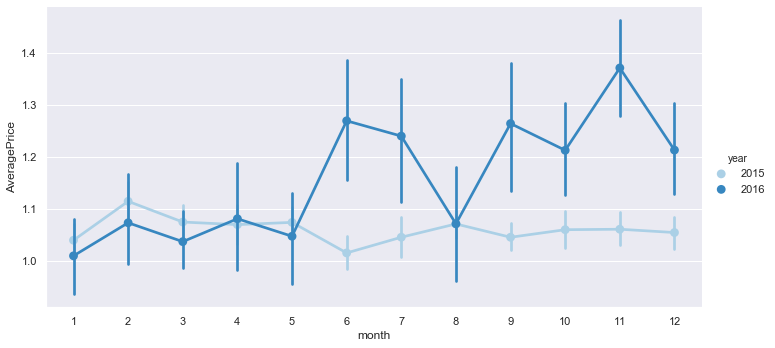

In [25]:
sns.factorplot('month','AveragePrice',data=df,hue='year',aspect=2, palette='Blues')

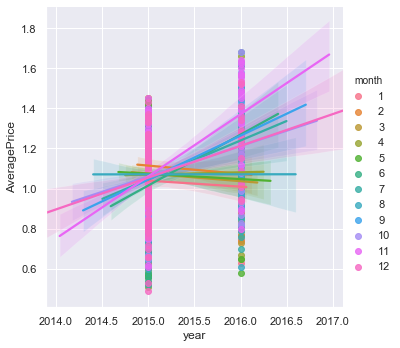

In [26]:
sns.lmplot('year','AveragePrice',hue='month',data=df)

In [27]:
df1=df1.drop(['day','month','year'],axis=1)

In [28]:
df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,Albany


In [29]:
#encoding the region through te labelEncoder
from sklearn.preprocessing import LabelEncoder
lex=LabelEncoder()
df1['region']=lex.fit_transform(df1['region'])



In [30]:
x=df1.iloc[:,1:]
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0


In [31]:
df['region'].nunique()

51

In [32]:
df1.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
region          0.288146
dtype: float64

In [33]:
#removing te skewness
from scipy.stats import boxcox
df1['Total Volume']=np.log(df1['Total Volume'])


In [34]:

df1['4046']=np.cbrt(df1['4046'])

In [35]:

df1['4225']=np.cbrt(df1['4225'])

In [36]:

df1['4770']=np.cbrt(df1['4770'])

In [37]:
df1['Total Bags']=np.log(df1['Total Bags'])


In [38]:
df1['4046']=np.cbrt(df1['4046'])
df1['4225']=np.cbrt(df1['4225'])
df1['4770']=np.cbrt(df1['4770'])
df1['Large Bags']=np.cbrt(df1['Large Bags'])
df1['Small Bags']=np.cbrt(df1['Small Bags'])
df1['XLarge Bags']=np.cbrt(df1['XLarge Bags'])

In [39]:
df1['Large Bags']=np.cbrt(df1['Large Bags'])
df1['Small Bags']=np.cbrt(df1['Small Bags'])
df1['XLarge Bags']=np.cbrt(df1['XLarge Bags'])

In [40]:
#skewness reduced
df1.skew()

AveragePrice   -0.109444
Total Volume    0.667461
4046            0.429800
4225            0.654794
4770            0.210989
Total Bags      0.695445
Small Bags      1.160403
Large Bags     -0.842801
XLarge Bags     0.524549
region          0.288146
dtype: float64

In [41]:
#checking for teh null values
df1.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
region          0
dtype: int64

In [42]:
x.columns

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'region'],
      dtype='object')

In [43]:
#removing the outliers
from scipy.stats import zscore
z=np.abs(zscore(df1))
df1=df1[(z<3).all(axis=1)]

In [44]:
df1.shape

(1487, 10)

In [45]:
df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,11.070329,2.163089,3.359126,1.538031,9.070718,2.736445,1.655198,0.0,0
1,1.35,10.912849,2.062128,3.285752,1.571123,9.159632,2.763758,1.663396,0.0,0
2,0.93,11.680304,2.100123,3.628944,1.718177,9.005202,2.716005,1.673841,0.0,0
3,1.08,11.277104,2.184320,3.464877,1.609746,8.667535,2.612930,1.722894,0.0,0
4,1.28,10.840357,2.140048,3.279153,1.617482,8.729713,2.628355,1.799324,0.0,0


In [46]:
x=df1.iloc[:,1:]
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,11.070329,2.163089,3.359126,1.538031,9.070718,2.736445,1.655198,0.0,0
1,10.912849,2.062128,3.285752,1.571123,9.159632,2.763758,1.663396,0.0,0
2,11.680304,2.100123,3.628944,1.718177,9.005202,2.716005,1.673841,0.0,0
3,11.277104,2.184320,3.464877,1.609746,8.667535,2.612930,1.722894,0.0,0
4,10.840357,2.140048,3.279153,1.617482,8.729713,2.628355,1.799324,0.0,0


In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)



In [48]:

x=pd.DataFrame(data=x)
x.head()

,0,1,2,3,4,5,6,7,8
0,-1.405766,-1.610025,-0.604883,-1.605588,-1.757257,-1.428169,-0.771216,-0.865775,-1.308399
1,-1.523768,-1.727296,-0.713207,-1.558223,-1.687763,-1.375757,-0.763011,-0.865775,-1.308399
2,-0.948699,-1.683163,-0.206545,-1.347745,-1.808463,-1.467393,-0.752557,-0.865775,-1.308399
3,-1.250825,-1.585364,-0.448761,-1.502942,-2.072379,-1.665188,-0.703464,-0.865775,-1.308399
4,-1.578088,-1.636788,-0.722949,-1.491870,-2.023782,-1.635589,-0.626971,-0.865775,-1.308399


In [49]:
df1.shape

(1487, 10)

In [50]:
y=df1.iloc[:,0:1]
y.head()

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28


In [51]:
max_rscore=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r_scr=r2_score(y_test,pred)
    print("R2_score corresponding to random state:",r_state,"is:",r_scr)
    if r_scr>max_rscore:
        max_rscore=r_scr
        final_r_state=r_state 
print()
print("max accuracy score corresponding to r_state is",final_r_state,"is:",max_rscore)

R2_score corresponding to random state: 42 is: 0.34740258074146335
R2_score corresponding to random state: 43 is: 0.3858438648839493
R2_score corresponding to random state: 44 is: 0.3546841967549378
R2_score corresponding to random state: 45 is: 0.42582752018291126
R2_score corresponding to random state: 46 is: 0.3715900852854753
R2_score corresponding to random state: 47 is: 0.34242231427246705
R2_score corresponding to random state: 48 is: 0.3971435834331245
R2_score corresponding to random state: 49 is: 0.3606449588423083
R2_score corresponding to random state: 50 is: 0.38990749703546734
R2_score corresponding to random state: 51 is: 0.3645690955733464
R2_score corresponding to random state: 52 is: 0.4180143127422489
R2_score corresponding to random state: 53 is: 0.39194663787994344
R2_score corresponding to random state: 54 is: 0.38192795649935385
R2_score corresponding to random state: 55 is: 0.42782762076656966
R2_score corresponding to random state: 56 is: 0.356023841024919
R2_s

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score
rfc=RandomForestRegressor()
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [5,10, 15, 20, 25, None],    
    'min_samples_leaf': [1, 2, 4, 6],
    'min_samples_split': [2, 5, 10, 20],
    'n_estimators': [25, 50, 100, 200]}

grid2_search = GridSearchCV(rfc, params, cv = 3)

In [53]:
grid2_search.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [5, 10, 15, 20, 25

In [54]:
grid2_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
model.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = model.predict(x)
    score = model.score(x, y)
    rmsle=(np.sqrt(mean_squared_log_error(y,pred)))
    print("The score is:",score)
    print("The root mean squared error is:",rmsle)
        
evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')

The score is: 0.9744958818604007
The root mean squared error is: 0.014634149858692198
The score is: 0.795174823941892
The root mean squared error is: 0.03838821903053754


In [56]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [57]:
df['region'].value_counts()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
GrandRapids            23
Chicago                23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
HarrisburgScranton     19
Syracuse               19
Midsouth               18
GreatLakes             18
Roanoke                17
MiamiFtLauderdale      17
DallasFtWort

In [58]:
df2=df.drop(['type'],axis=1)

In [59]:
df2=df2.drop(['Date','year','month','day'],axis=1)

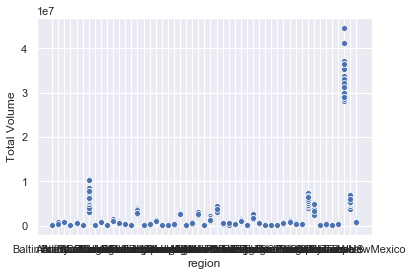

In [60]:
sns.scatterplot(x='region',y='Total Volume',data=df2)

In [61]:
from sklearn.preprocessing import LabelEncoder
lex = LabelEncoder()
df2['region']=lex.fit_transform(df['region'])

In [62]:
df2.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0


In [63]:
df2[['Total Volume','region']].groupby(['region'],as_index=False).mean()

,region,Total Volume
0,0,7.629020e+04
1,1,4.676372e+05
2,2,8.076442e+05
3,3,8.104617e+04
4,4,5.534586e+05
5,5,1.321844e+05
6,6,6.035277e+06
7,7,1.762781e+05
8,8,8.118822e+05
9,9,1.457604e+05


In [64]:
df2.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0


In [65]:
df2.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,-0.229408
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,0.236579
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,0.269481
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,0.215733
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.138092
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.190001
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.168650
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,0.297452
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,-0.046144
region,-0.229408,0.236579,0.269481,0.215733,0.138092,0.190001,0.168650,0.297452,-0.046144,1.000000


In [66]:
y2=df2.iloc[:,9:10]
y2.head()

,region
0,0
1,0
2,0
3,0
4,0


In [67]:
x2=df2.iloc[:,0:9]
x2.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0


In [68]:
df2.shape

(1517, 10)

In [69]:
df2.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
region          0.288146
dtype: float64

In [70]:
df2['4046']=np.cbrt(df2['4046'])
df2['4225']=np.cbrt(df2['4225'])
df2['4770']=np.cbrt(df2['4770'])


In [71]:
df2['Total Volume']=np.log(df2['Total Volume'])
df2['Total Bags']=np.log(df2['Total Bags'])
df2['4046']=np.cbrt(df2['4046'])

In [72]:
df2['Large Bags']=np.cbrt(df2['Large Bags'])
df2['Small Bags']=np.cbrt(df2['Small Bags'])
df2['XLarge Bags']=np.cbrt(df2['XLarge Bags'])


In [73]:
df2.skew()

AveragePrice   -0.109444
Total Volume    0.667461
4046            0.429800
4225            1.775945
4770            1.526943
Total Bags      0.695445
Small Bags      2.143413
Large Bags      1.431704
XLarge Bags     2.000670
region          0.288146
dtype: float64

In [74]:
df2.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
AveragePrice,1.000000,-0.326692,-0.508309,-0.136281,-0.202176,-0.190093,-0.135573,-0.263009,-0.056975,-0.229408
Total Volume,-0.326692,1.000000,0.810785,0.905675,0.738344,0.938094,0.889294,0.757227,0.493905,0.198022
4046,-0.508309,0.810785,1.000000,0.610794,0.658928,0.703724,0.687945,0.698611,0.425052,0.333169
4225,-0.136281,0.905675,0.610794,1.000000,0.762710,0.878912,0.924924,0.730504,0.535928,0.160270
4770,-0.202176,0.738344,0.658928,0.762710,1.000000,0.719219,0.796824,0.585600,0.728007,0.071371
Total Bags,-0.190093,0.938094,0.703724,0.878912,0.719219,1.000000,0.940441,0.772151,0.553059,0.158998
Small Bags,-0.135573,0.889294,0.687945,0.924924,0.796824,0.940441,1.000000,0.754218,0.642202,0.152392
Large Bags,-0.263009,0.757227,0.698611,0.730504,0.585600,0.772151,0.754218,1.000000,0.438720,0.254242
XLarge Bags,-0.056975,0.493905,0.425052,0.535928,0.728007,0.553059,0.642202,0.438720,1.000000,-0.132671
region,-0.229408,0.198022,0.333169,0.160270,0.071371,0.158998,0.152392,0.254242,-0.132671,1.000000


In [75]:
z=np.abs(zscore(df2))

In [76]:
df2=df2[(z<3).all(axis=1)]
df2.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,11.070329,2.163089,37.903460,3.638275,9.070718,20.490870,4.534711,0.0,0
1,1.35,10.912849,2.062128,35.473513,3.878204,9.159632,21.110581,4.602425,0.0,0
2,0.93,11.680304,2.100123,47.790416,5.072283,9.005202,20.035113,4.689671,0.0,0
3,1.08,11.277104,2.184320,41.597133,4.171309,8.667535,17.839520,5.114173,0.0,0
4,1.28,10.840357,2.140048,35.260208,4.231732,8.729713,18.157325,5.825433,0.0,0


In [77]:
df2.shape

(1442, 10)

In [78]:
df['region'].nunique()

51

In [79]:
max_ascore=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=.30,random_state=r_state)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    a_scr=accuracy_score(y_test,pred)
    print("accuracy_score corresponding to random state:",r_state,"is:",a_scr)
    if a_scr>max_ascore:
        max_ascore=a_scr
        final_r_state=r_state
print()
print("max accuracy score corresponding to r_state is",final_r_state,"is:",max_ascore)

accuracy_score corresponding to random state: 42 is: 0.3201754385964912
accuracy_score corresponding to random state: 43 is: 0.31140350877192985
accuracy_score corresponding to random state: 44 is: 0.2916666666666667
accuracy_score corresponding to random state: 45 is: 0.3026315789473684
accuracy_score corresponding to random state: 46 is: 0.30701754385964913
accuracy_score corresponding to random state: 47 is: 0.3618421052631579
accuracy_score corresponding to random state: 48 is: 0.3574561403508772
accuracy_score corresponding to random state: 49 is: 0.33114035087719296
accuracy_score corresponding to random state: 50 is: 0.3157894736842105
accuracy_score corresponding to random state: 51 is: 0.31140350877192985
accuracy_score corresponding to random state: 52 is: 0.2894736842105263
accuracy_score corresponding to random state: 53 is: 0.3048245614035088
accuracy_score corresponding to random state: 54 is: 0.3267543859649123
accuracy_score corresponding to random state: 55 is: 0.30263

In [80]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
print(knn.score(x_train,y_train))



0.8606388775267679


In [92]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
sample_split_range = list(range(2, 50))
param_grid1 = dict(min_samples_split=sample_split_range)
grid1_search=GridSearchCV(dtc, param_grid1, cv=10, scoring='accuracy')

In [93]:
grid1_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 1

In [96]:
grid1_search.best_estimator_ 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [97]:
from sklearn.metrics import f1_score
dtc = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
dtc.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = dtc.predict(x)
    score = dtc.score(x, y)    
    f1_scr=f1_score(y,pred,average='weighted')
    print("The score is:",score)
    print("The F1 Score is:",f1_scr)

evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')

The score is: 0.9905749293119699
The F1 Score is: 0.9905503506123976
The score is: 0.8421052631578947
The F1 Score is: 0.8426447472862304


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
rfc=RandomForestClassifier()
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [5,10, 15, 20, 25, None],    
    'min_samples_leaf': [1, 2, 4, 6],
    'min_samples_split': [2, 5, 10, 20],
    'n_estimators': [25, 50, 100, 200]}

grid_search = GridSearchCV(rfc, params, cv = 3)

In [83]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [89]:
grid_search.best_estimator_ 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [91]:
from sklearn.metrics import f1_score
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rfc.fit(x_train, y_train) 

def evaluate(x2, y2, dataset):
    pred = rfc.predict(x2)
    score = rfc.score(x2, y2)    
    f_scr=f1_score(y2,pred,average='weighted')
    print("The score is:",score)
    print("The accuracy Score is:",f_scr)
        

evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')

The score is: 1.0
The accuracy Score is: 1.0
The score is: 0.9364035087719298
The accuracy Score is: 0.9366070812092843


In [86]:
#validating for the overfitting and underfitting
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,x2,y2,cv=5)
print('Score:',score)

Score: [0.85493827 0.89808917 0.94059406 0.93559322 0.91103203]


In [87]:
#RandomForestClassifier giving the best results

In [100]:
from sklearn.externals import joblib
joblib.dump(model,'Avocado_regression.pkl')

['Avocado_regression.pkl']

In [101]:
from sklearn.externals import joblib
joblib.dump(rfc,'Avocado_classification.pkl')

['Avocado_classification.pkl']